In [52]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
from matplotlib import cm
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft
from scipy import io

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.random.seed(123)

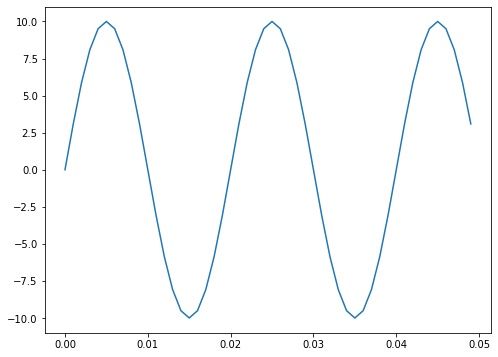

Signal power in time 50.000000 [V^2]
Signal energy in time 5000.000000 [V^2*s]
Also signal energy in time 5000.000000 [V^2*s]


In [53]:
# create the signal
len_time = 100  # sample length [in seconds]
fs = 1000.0  # sample frequency [in Hz]
ts = 1.0 / fs  # sample time [in seconds]
t = np.arange(0, len_time, ts)  # time step vector
sig = 10*np.sin(2.0 * 50.0 * np.pi * t)  # signal

# plot some part of the signal
plt.figure(figsize=(8, 6))
plt.plot(t[0:50], sig[0:50])
plt.show()

# calculate power in time domain
power_time = sum(abs(sig)**2.0) / len(sig)
print('Signal power in time %8.6f [V^2]' % (power_time))

# calculate energy in time domain
energy_time = power_time * len_time
print('Signal energy in time %8.6f [V^2*s]' % (energy_time))

# calculate energy2 in time domain
energy2_time = sum(abs(sig)**2.0) * ts
print('Also signal energy in time %8.6f [V^2*s]' % (energy2_time))

Signal power from FFT 50.000000 [V^2]
Signal energy from FFT 5000.000000 [V^2/Hz = V^2*s]


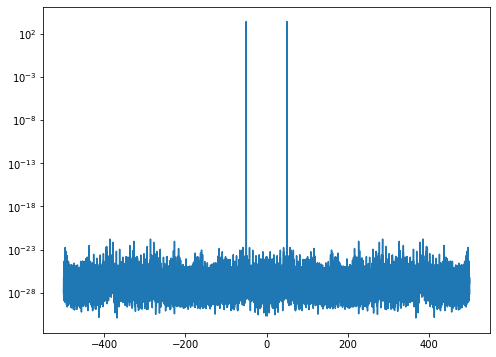

In [54]:
f_fft = fft.fftshift(fft.fftfreq(len(sig), ts))
sp_fft = fft.fftshift(fft.fft(sig))
psd_fft = np.abs(sp_fft)**2. / (len(sig) * fs)

df_fft = f_fft[1] - f_fft[0]
fft_power = np.sum(psd_fft) * df_fft
print('Signal power from FFT %8.6f [V^2]' % (fft_power))

fft_energy = np.sum(psd_fft)
print('Signal energy from FFT %8.6f [V^2/Hz = V^2*s]' % (fft_energy))

plt.figure(figsize=(8, 6))
plt.semilogy(f_fft, psd_fft)
plt.show()

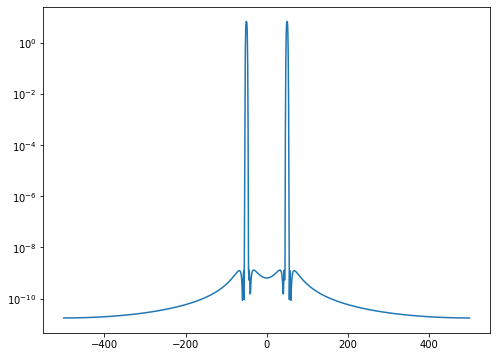

Signal power from welch 50.000000
Signal power from welch 51.200000


In [64]:
window_size = 1024

plt.figure(figsize=(8, 6))
f_welch, psd_welch = signal.welch(sig,
                                  fs,
                                  window='flattop',
                                  nperseg=window_size,
                                  noverlap=0,
                                  nfft=window_size,
                                  detrend=False,
                                  scaling='density',
                                  return_onesided=False)
f_welch = fft.fftshift(f_welch)
psd_welch = fft.fftshift(psd_welch)
plt.semilogy(f_welch, psd_welch)
plt.show()

df_welch = f_welch[1] - f_welch[0]
welch_power = np.sum(psd_welch) * df_welch
print('Signal power from welch %8.6f' % (welch_power))

welch_energy = welch_power * 1./fs * window_size
print('Signal power from welch %8.6f' % (welch_energy))

In [ ]:
window_type = 'box'
window_len = 1024
f_stft, t_stft, ps_stft = signal.stft(sig,
                                      fs,
                                      window='flattop',
                                      nperseg=1024,
                                      noverlap=0,
                                      nfft=1024,
                                      detrend=False,
                                      return_onesided=False)

f_stft = fft.fftshift(f_stft)
ps_stft = fft.fftshift(ps_stft, axes=0)
psd_stft = np.abs(ps_stft)**2.

df_stft = f_stft[1] - f_stft[0]
stft_power = np.sum(psd_stft[:, 2]) * df_stft
print('Signal power from STFT %8.6f' % (stft_power))

plt.figure(figsize=(8, 6))
plt.semilogy(f_stft, psd_stft[:, 1])
plt.show()

# np.sum(psd_stft[:, 10])

# dt = t_stft[-1] - t_stft[0]
# np.sum(psd_stft) * dt